In [89]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# Скопление галактик Coma (Abell 1656)

изображение

http://aladin.unistra.fr/AladinLite/?target=12%2059%2050.922%2B27%2058%206.22&fov=2.92&survey=P%2FSDSS9%2Fcolor

информация об объекте

http://ned.ipac.caltech.edu/

In [90]:
data = pd.read_table("Coma_NED.dat",sep='\t',skiprows=17,usecols=[2,3,4,5,6,10],header=None)

In [91]:
data.columns=['ra','dec','type','velocity','z','dist']


In [92]:
data.head()

,ra,dec,type,velocity,z,dist
0,194.95246,27.98274,G,5306,0.017700,13
1,194.94492,27.97385,G,9453,0.031532,83
2,194.94556,27.99192,G,8360,0.027886,19
3,194.93653,27.96867,G,9870,0.032923,5
4,194.96745,27.99621,G,8641,0.028823,6


In [93]:
# Красное смещение скопления галактик Coma (Abell 1656)
z_Coma = 0.0231 

In [94]:
#cкорость света в км/с
c=3.e5

In [95]:
data['rel_vel'] = c*((data.z-z_Coma)/(1.+z_Coma))

In [96]:
data.head()


,ra,dec,type,velocity,z,dist,rel_vel
0,194.95246,27.98274,G,5306,0.017700,13,-1583.422930
1,194.94492,27.97385,G,9453,0.031532,83,2472.485583
2,194.94556,27.99192,G,8360,0.027886,19,1403.381879
3,194.93653,27.96867,G,9870,0.032923,5,2880.363601
4,194.96745,27.99621,G,8641,0.028823,6,1678.135080


(array([  3.,  29.,  87., 176., 256., 340., 224.,  79.,  33.,  23.]),
 array([3834. , 4448.3, 5062.6, 5676.9, 6291.2, 6905.5, 7519.8, 8134.1,
        8748.4, 9362.7, 9977. ]),
 <a list of 10 Patch objects>)

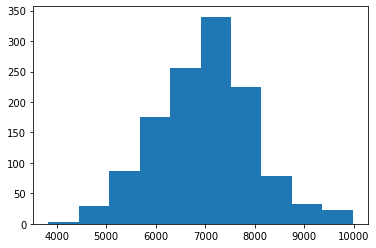

In [97]:
plt.hist(data['velocity'])

In [98]:
data['velocity'].mean()

7000.5648

In [99]:
data['velocity'].std()

1000.6744263980559

In [100]:
R = 180 # arcmin
# Перевести в физический радиус

# Расстояние до скопления галактик Coma

## 1) Закон Хаббла
# $ D = \frac{cz}{H_0}$

## $H_0$ = 70 km/s/Mpc

In [101]:
D_Hubble = c*z_Coma/70.
D_Hubble

99.0

In [102]:
# Пусть размер скопления = 180 угловых минут

In [103]:
Rcl_arcmin = 180.

In [104]:
Rcl_kpc = Rcl_arcmin/60.*np.pi/180.*D_Hubble*1000.
Rcl_kpc

5183.627878423159

## 2) космологическое расстояние

# $D = \int_0^{z} \frac{c }{H(t)}dz$

http://www.astro.ucla.edu/~wright/CosmoCalc.html

In [105]:
Rcl = 0.466*180.*60 # в килопарсеках
print(Rcl)

5032.8


In [106]:
G = 4.302e-3 #pc/Msun (km/s)^2

In [107]:
Mass=Rcl*3.*data['rel_vel'].std()*data['rel_vel'].std()/G/1e-3/1e15
print(Mass, "10^{15} Msun")

3.362051709426284 10^{15} Msun


# Определеним $r_{halfmass}$ 

Text(0, 0.5, 'relative velocity, km/s')

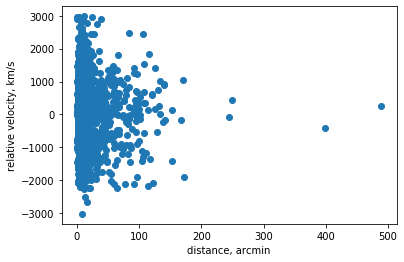

In [108]:
plt.scatter(data.dist, data.rel_vel)
plt.xlabel('distance, arcmin')
plt.ylabel('relative velocity, km/s')

In [109]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [110]:
coma_ra=194.953054
coma_dec=27.980694



In [111]:
data['dist_v2'] = SkyCoord(ra=data.ra, dec=data.dec, unit=(u.deg, u.deg), frame='icrs').separation(SkyCoord(ra=coma_ra*u.degree, dec=coma_dec*u.degree, frame='icrs')).arcmin


In [112]:
data.head()


,ra,dec,type,velocity,z,dist,rel_vel,dist_v2
0,194.95246,27.98274,G,5306,0.017700,13,-1583.422930,0.126730
1,194.94492,27.97385,G,9453,0.031532,83,2472.485583,0.595307
2,194.94556,27.99192,G,8360,0.027886,19,1403.381879,0.781882
3,194.93653,27.96867,G,9870,0.032923,5,2880.363601,1.134523
4,194.96745,27.99621,G,8641,0.028823,6,1678.135080,1.203517


In [113]:
data.to_csv('/home/natalie/Downloads/Coma_NED_v2.dat',
                             sep='\t',header=True, columns=['ra','dec','velocity','z','dist_v2'], index=False)   

Text(0, 0.5, 'relative velocity, km/s')

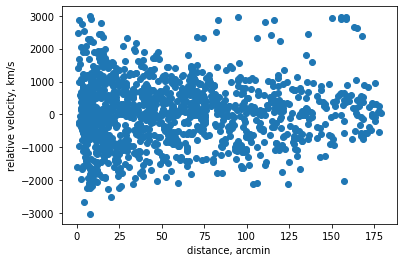

In [114]:
plt.scatter(data.dist_v2, data.rel_vel)
plt.xlabel('distance, arcmin')
plt.ylabel('relative velocity, km/s')

In [115]:
data = data.sort_values(by=['dist_v2'], ascending=True)


In [116]:
int(data.shape[0]/100.)


12

In [117]:
Ngal_per_bin=80

indices = np.arange(0,data.shape[0],Ngal_per_bin)
print(indices)

[   0   80  160  240  320  400  480  560  640  720  800  880  960 1040
 1120 1200]


In [118]:
rbins=np.array([data.dist_v2[i] for i in indices])

In [119]:
rc = (rbins[:-1]+rbins[1:])/2.
area = np.pi*(rbins[1:]**2-rbins[:-1]**2)*(0.466*60.)**2

In [120]:
rc_kpc = rc * 0.466*60.
print(rc_kpc.max())

4009.44233666918


In [121]:
SB = Ngal_per_bin/area

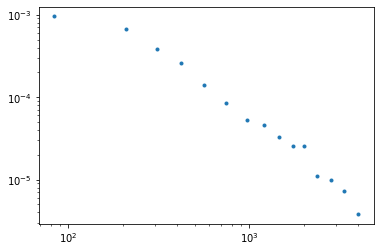

In [122]:
plt.loglog(rc_kpc,SB,'.')

# Задача на дом: определить $r_{halfmass}$ и посчитать массу